In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.unet_model import UNetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 

json_file = "configs/unet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: dice_coeff
batch_size: 2
checkpoint_dir: ./experiments\unet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: unet_kittiroad
final_model_dir: ./experiments\unet_kittiroad\saved_model/
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 30
num_iter_per_epoch: 100
summary_dir: ./experiments\unet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (578, 320, 480, 3)
Size of masks collection :  (578, 320, 480)


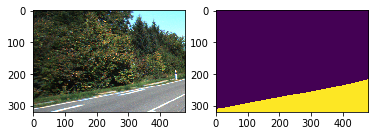

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [3]:
tf.reset_default_graph()

model = UNetModel(config)
model.build() 

Model built successfully.


In [4]:
# create a builder for saving the model 
builder = tf.saved_model.builder.SavedModelBuilder(config.final_model_dir)

In [5]:
with tf.Session() as sess : 
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
    trainer.train()
    model.load(sess)
    print("Saving the final model..")
    builder.add_meta_graph_and_variables(sess,
                                       [tf.saved_model.tag_constants.TRAINING],
                                       signature_def_map=None,
                                       assets_collection=None)
builder.save()
print("Final model saved")

Variables initialized
Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:29<00:00,  1.55s/it]


-->Last epoch loss     :  1.1072093
-->Last epoch accuracy :  0.238136
-->Last test loss      :  0.7039054
-->Last test accuracy  :  0.4493817
[BEST LOST : 0.7039054036140442]
Saving model...
Model saved
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


-->Last epoch loss     :  0.61219114
-->Last epoch accuracy :  0.51980543
-->Last test loss      :  0.3863714
-->Last test accuracy  :  0.78105253
[BEST LOST : 0.3863714039325714]
Saving model...
Model saved
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


-->Last epoch loss     :  0.44098082
-->Last epoch accuracy :  0.69139725
-->Last test loss      :  0.3043631
-->Last test accuracy  :  0.7970246
[BEST LOST : 0.30436310172080994]
Saving model...
Model saved
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


-->Last epoch loss     :  0.38781086
-->Last epoch accuracy :  0.738821
-->Last test loss      :  0.2976473
-->Last test accuracy  :  0.7863393
[BEST LOST : 0.29764729738235474]
Saving model...
Model saved
Epoch  4


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.51s/it]


-->Last epoch loss     :  0.368935
-->Last epoch accuracy :  0.74730814
-->Last test loss      :  0.29946512
-->Last test accuracy  :  0.81415695
Epoch  5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


-->Last epoch loss     :  0.34723586
-->Last epoch accuracy :  0.75219035
-->Last test loss      :  0.25331917
-->Last test accuracy  :  0.8439348
[BEST LOST : 0.2533191740512848]
Saving model...
Model saved
Epoch  6


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


-->Last epoch loss     :  0.29838848
-->Last epoch accuracy :  0.8021776
-->Last test loss      :  0.28535298
-->Last test accuracy  :  0.8134002
Epoch  7


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.53s/it]


-->Last epoch loss     :  0.31173593
-->Last epoch accuracy :  0.7917928
-->Last test loss      :  0.23828101
-->Last test accuracy  :  0.85261047
[BEST LOST : 0.2382810115814209]
Saving model...
Model saved
Epoch  8


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


-->Last epoch loss     :  0.31052476
-->Last epoch accuracy :  0.7756606
-->Last test loss      :  0.23467764
-->Last test accuracy  :  0.8516306
[BEST LOST : 0.23467764258384705]
Saving model...
Model saved
Epoch  9


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.55s/it]


-->Last epoch loss     :  0.31250897
-->Last epoch accuracy :  0.78878105
-->Last test loss      :  0.21747115
-->Last test accuracy  :  0.85800743
[BEST LOST : 0.2174711525440216]
Saving model...
Model saved
Epoch  10


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:37<00:00,  1.57s/it]


-->Last epoch loss     :  0.2702511
-->Last epoch accuracy :  0.8204109
-->Last test loss      :  0.23279725
-->Last test accuracy  :  0.84026116
Epoch  11


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:36<00:00,  1.55s/it]


-->Last epoch loss     :  0.26646122
-->Last epoch accuracy :  0.8105089
-->Last test loss      :  0.22671165
-->Last test accuracy  :  0.8703112
Epoch  12


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:33<00:00,  1.51s/it]


-->Last epoch loss     :  0.2157862
-->Last epoch accuracy :  0.8521478
-->Last test loss      :  0.19961919
-->Last test accuracy  :  0.87964725
[BEST LOST : 0.19961918890476227]
Saving model...
Model saved
Epoch  13


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.52s/it]


-->Last epoch loss     :  0.24496602
-->Last epoch accuracy :  0.84039044
-->Last test loss      :  0.2162296
-->Last test accuracy  :  0.85320866
Epoch  14


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


-->Last epoch loss     :  0.25001827
-->Last epoch accuracy :  0.8173621
-->Last test loss      :  0.19981836
-->Last test accuracy  :  0.87783366
Epoch  15


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:33<00:00,  1.54s/it]


-->Last epoch loss     :  0.26427495
-->Last epoch accuracy :  0.83177966
-->Last test loss      :  0.24617581
-->Last test accuracy  :  0.8551148
Epoch  16


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.54s/it]


-->Last epoch loss     :  0.235614
-->Last epoch accuracy :  0.8425592
-->Last test loss      :  0.19213109
-->Last test accuracy  :  0.87808263
[BEST LOST : 0.19213108718395233]
Saving model...
Model saved
Epoch  17


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.56s/it]


-->Last epoch loss     :  0.21252342
-->Last epoch accuracy :  0.8563063
-->Last test loss      :  0.22085996
-->Last test accuracy  :  0.8545225
Epoch  18


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:33<00:00,  1.53s/it]


-->Last epoch loss     :  0.19362259
-->Last epoch accuracy :  0.86959076
-->Last test loss      :  0.17291348
-->Last test accuracy  :  0.88375586
[BEST LOST : 0.17291347682476044]
Saving model...
Model saved
Epoch  19


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.53s/it]


-->Last epoch loss     :  0.1987306
-->Last epoch accuracy :  0.8626646
-->Last test loss      :  0.22641554
-->Last test accuracy  :  0.86913663
Epoch  20


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.50s/it]


-->Last epoch loss     :  0.22274965
-->Last epoch accuracy :  0.854771
-->Last test loss      :  0.22496457
-->Last test accuracy  :  0.86455953
Epoch  21


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.50s/it]


-->Last epoch loss     :  0.18280335
-->Last epoch accuracy :  0.8865361
-->Last test loss      :  0.25274727
-->Last test accuracy  :  0.8490638
Epoch  22


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


-->Last epoch loss     :  0.22527456
-->Last epoch accuracy :  0.858103
-->Last test loss      :  0.18557325
-->Last test accuracy  :  0.89598054
Epoch  23


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.52s/it]


-->Last epoch loss     :  0.21277471
-->Last epoch accuracy :  0.85166305
-->Last test loss      :  0.18708758
-->Last test accuracy  :  0.88523483
Epoch  24


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


-->Last epoch loss     :  0.20877537
-->Last epoch accuracy :  0.8535432
-->Last test loss      :  0.21406592
-->Last test accuracy  :  0.87347734
Early Stopping !
Loading model checkpoint ./experiments\unet_kittiroad\checkpoint/-1900 ...
INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\checkpoint/-1900
Model loaded
Saving the final model..
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./experiments\unet_kittiroad\saved_model/saved_model.pb
Final model saved


Loading final model 
INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\saved_model/variables\variables
Final model loaded


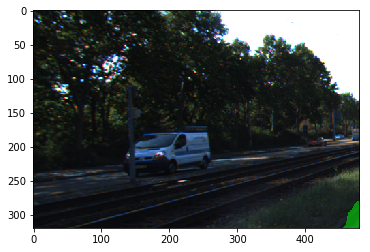

Accuracy :  0.15949455


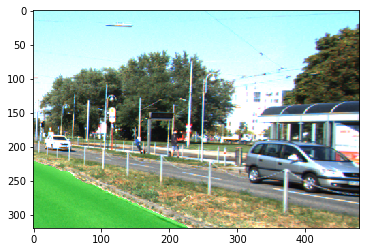

Accuracy :  0.9797771


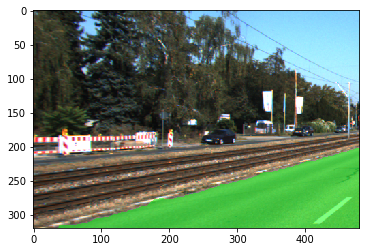

Accuracy :  0.9811103


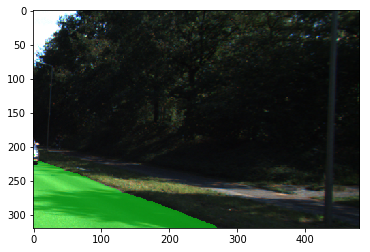

Accuracy :  0.9845632


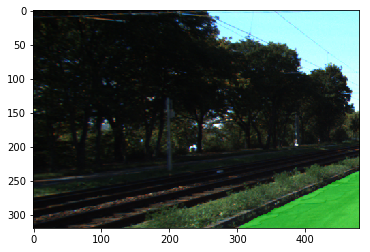

Accuracy :  0.9741287


In [6]:
with tf.Session() as sess:   
    print("Loading final model ")
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.TRAINING], config.final_model_dir)
    print("Final model loaded")
    test = [data.get_data_element("test_data",i) for i in range(5)]
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)

Variables initialized
Loading model checkpoint ./experiments\unet_kittiroad\checkpoint/-1900 ...
INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\checkpoint/-1900
Model loaded


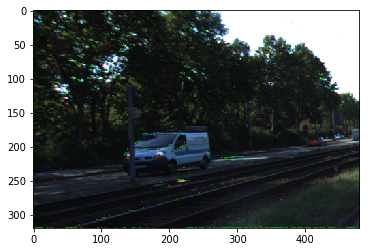

Accuracy :  0.0010317845


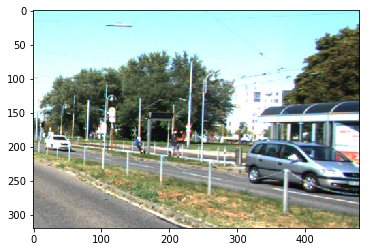

Accuracy :  0.12948291


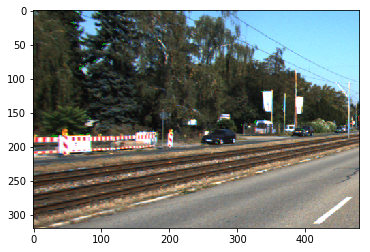

Accuracy :  0.24426055


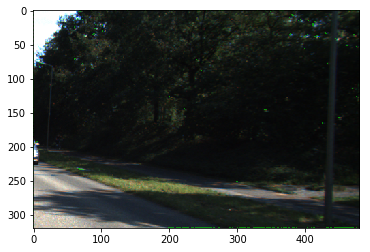

Accuracy :  0.15260659


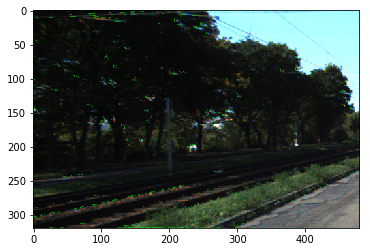

Accuracy :  0.0903169


In [7]:
with tf.Session() as sess:   
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
    model.load(sess)
    test = [data.get_data_element("test_data",i) for i in range(5)]
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)